## Missing Values (Eksik Degerler)
Gozlemlerde eksiklik olmasi durumunu ifade etmektedir. (NA)

Eksik deger problemi nasil cozulur? 

Yayginca kullanilan 3 method:
1. Silme
2. Deger Atama Yontemleri (Orn: Mean, Mode ya da Median gibi deger atama yontemleri --> Basit atama yontemleri -Tahmine dayanmaz-)
3. Tahmine Dayali Yontemler (Makine ogrenmesi ya da istatiksel bazi yontemler ile tahminlere gore deger atamaya dayanmaktadir.)

"The idea of imputation is both seductive and dangerous" (R.J.A. Little & D.B. Rubin) 

Eksik veri literaturu oldukca genis bir liteatur ve ozellikle istatistikcilerin camiasinda cok onemli bir konu.

Eksik veri ile calisirken goz onunde bulundurulmasi gereken onemli konulardan birisi: __Eksik verilerin rassalligi__ (Eksikligin rastgele ortaya cikip cikmadiginin bilinmesi gerektigi!!!)

__"Eksik degere sahip gozlemlerin veri setinden direkt cikarilmasi ve rassalliginin incelenmemesi, yapilacak istatiksel cikarimlarin ve modelleme calismalarinin guvenilirligini dusurecektir." (Reha Alpar, 2011)__

__"Eksik gozlemlerin veri setinden direkt cikarilabilmesi icin veri setindeki eksikligin bazi durumlarda kismen bazi durumlarda tamamen raslantisal olarak olusmus olmasi gerekmektedir.__

__Eger eksiklikler degiskenler ile iliskili olarak ortaya cikan yapisal problemler ile meydana gelmis ise bu durumda yapilacak silme islemleri ciddi yanliliklara sebep olabilecektir." (Tabachnick ve Fidell, 1996)__


Peki burada ne denilmek isteniyor? Diyelim ki bir degiskeni inceliyoruz: Kredi karti harcama degiskeni/ aylik ortalama harcama

Bazi degerleri NA olsun --> Bunlar rastgele ortaya ciktiysa problem yok. Yukaridaki herhangi 3 yontemden birini kullanabiliriz. (Sil, basit ata, tahmine dayali ata)

Peki bu eksik degerlerin bagimli olmasi, rastgele olmamasi ne demek?? --> Var sayalim ki yukaridaki degisken ile birlikte kredi karti var mi yok mu degiskeni de olsun. Bir kisinin kredi karti yoksa kredi karti harcamasi da sifir olacaktir. Sifir numerik olarak basilmadigindan NA olacaktir. Boylece degiskendeki eksiklik rastgele olmamis oluyor, baska bir degiskenin etkisi ile ortaya cikmis oluyor. 

Peki boyle oldugunda ne yapacagiz?? Gelistirme yaparken goz onunde bulundurmamiz gereken nokta: (Jr ile Sen. ayirir) Bu yapisalligin nereden kaynaklandigini bulup cozmekle ugrasmak gerekir.

### Eksik Degerlerin Yakalanmasi (Analiz edilmesi)

In [1]:
import pandas as pd
def load():
    data = pd.read_csv("/home/esra/Miuul_Data_Scientist_Path/Feature_Engineering/.feature_engineering/datasets/titanic.csv")
    return data

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Eksik gozlem var mi yok mu sorgusu (tum veride)***
df.isnull().values.any()

True

In [3]:
# Butun hucreleri gez bak bakalim bir eksiklik var mi
df.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Yukaridaki true ya da false kayitlarini values olarak arrayde tutariz
df.isnull().values


# Herhangi bir eksiklik varsa bunu getir kismi da any() ile olur.

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [5]:
# degiskenlerdeki eksik deger sayisi
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# degiskenlerdeki tam deger(dolular) sayisi
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
# Veri setindeki toplam eksik deger sayisina ulasmak icin
df.isnull().sum().sum()

866

In [8]:
# en az bir tane eksik degere sahip olan gozlem birimleri
df[df.isnull().any(axis=1)]

# bir satirda en az bir tane eksik gozlem birimi olan satirlar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# tum verileri tam olan gozlem birimleri
df[df.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
# azalan sekilde siralamak
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
# eksik verilerin tum verilere orani
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [12]:
# sadece eksik degere sahip degiskenleri yakalamak
# list comp ile yapabiliriz

na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print(na_cols)


['Age', 'Cabin', 'Embarked']


In [13]:
# simdi tek bir fonksiyonla eksik degerlerin bulundugu degiskenleri yakalayip,
# eksik degerlerin de ratiosu ve sayilarini gorebilecegiz
import numpy as np

def missing_values_table(dataframe, na_name=False):
    na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = dataframe[na_cols].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_cols].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end='\n')
    if na_name:
        return na_cols


In [14]:
missing_values_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [15]:
missing_values_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

### Eksik Deger Problemini Cozme
Eger agac yontemleri kullanilacaksa eksik degerler aykiri degerlerde oldugu gibi goz ardi edilebilir.

Mak. Ogrenmesi egitiminde daha detayli ele alinacak fakat ozetle soyle soyleyebiliriz sebebini:
- Agac yontemleri dogrusal yontemlerde ya da grad. descent gibi optimizasyona dayali yontemlerde oldugu gibi degil de daha esnek ve dallara ayirmali bir sekilde calisiyor oldugundan dolayi bu noktadaki aykiriliklar ve eksikliklerin etkisi neredeyse yoka yakindir. Tamamen etkisi yok demek dogru degil ama yoka yakin oldugu icin goz ardi etmek mantiklidir.

- Tek istisnasi var: Eger ilgilenilen problem regresyon problemi ise ve bagimli degisken de sayisal bir degiskense bu durumda aykirilik oldugunda sonuca gitmesi biraz uzun surebilir. Bagimli degiskende yer alabilecek aykiriliklardan dolayi optimizasyon islemlerinin suresi uzayabilir.

Dogrusal yontemlerde ve Gradient descent temelli yontemlerde bu teknikler cok daha hassas iken agaca dayali yontemlerde bunlarin etkisi cok cok daha dusuktur.

In [16]:
# Cozum 1: Hizlica silmek
df.dropna().shape

# veri ciddi azaldi, veri boyutu yeterli ise bu yontemi kullan

(183, 12)

In [17]:
# Cozum 2: Basit atama yontemleri ile doldurmak
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
# yeniden atama islemi yapmadigimiz icin gozlemleyemedik 
# veriyi bozmamak icin ama soyle bir kontrol edelim
df['Age'].fillna(df['Age'].mean()).isnull().sum()


# mode yerine median ile de doldurulabilirdi

0

In [19]:
# ya da sabit bir degerle doldurabiliriz - burada 0
df['Age'].fillna(0).isnull().sum()

0

Peki burada yas degiskenini gorduk yaptik. Bizim elimizde bir suru degisken varken nasil hizli bir sekilde dolduracagim? Ileri duzey dusunmeye baslamamiz lazim burada. Aply ile fillna kullanalim. (axis=0 oldugunda satirlara gidiyorum boylece konuya sutun bazli bakmis oluyorum.)

__Dolayisi ile konuya sutun bazli satirlar acisindan bakmayi axis=0 olarak ifade ediyorum.__ Mesela sutunun ortalasini almak gerektiginde aslinda asagi dogru satirlarin ortalamasini almak demek.

In [20]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)

# apply satirlarda veya sutunlarda gezecek burada ben satirlara gore gezmesini istiyorum --> axis=0
# satirlara gore gittiginde aslinda sutun bazinda bakmis oluyorum.
# mesela sutunun ortalamasini alacagim zaman satirlara gore bakip asagi dogru sutunun ortalamasini almak demek.

TypeError: Could not convert Braund, Mr. Owen HarrisCumings, Mrs. John Bradley (Florence Briggs Thayer)Heikkinen, Miss. LainaFutrelle, Mrs. Jacques Heath (Lily May Peel)Allen, Mr. William HenryMoran, Mr. JamesMcCarthy, Mr. Timothy JPalsson, Master. Gosta LeonardJohnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)Nasser, Mrs. Nicholas (Adele Achem)Sandstrom, Miss. Marguerite RutBonnell, Miss. ElizabethSaundercock, Mr. William HenryAndersson, Mr. Anders JohanVestrom, Miss. Hulda Amanda AdolfinaHewlett, Mrs. (Mary D Kingcome) Rice, Master. EugeneWilliams, Mr. Charles EugeneVander Planke, Mrs. Julius (Emelia Maria Vandemoortele)Masselmani, Mrs. FatimaFynney, Mr. Joseph JBeesley, Mr. LawrenceMcGowan, Miss. Anna "Annie"Sloper, Mr. William ThompsonPalsson, Miss. Torborg DaniraAsplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)Emir, Mr. Farred ChehabFortune, Mr. Charles AlexanderO'Dwyer, Miss. Ellen "Nellie"Todoroff, Mr. LalioUruchurtu, Don. Manuel ESpencer, Mrs. William Augustus (Marie Eugenie)Glynn, Miss. Mary AgathaWheadon, Mr. Edward HMeyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarMamee, Mr. HannaCann, Mr. Ernest CharlesVander Planke, Miss. Augusta MariaNicola-Yarred, Miss. JamilaAhlin, Mrs. Johan (Johanna Persdotter Larsson)Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)Kraeff, Mr. TheodorLaroche, Miss. Simonne Marie Anne AndreeDevaney, Miss. Margaret DeliaRogers, Mr. William JohnLennon, Mr. DenisO'Driscoll, Miss. BridgetSamaan, Mr. YoussefArnold-Franchi, Mrs. Josef (Josefine Franchi)Panula, Master. Juha NiiloNosworthy, Mr. Richard CaterHarper, Mrs. Henry Sleeper (Myna Haxtun)Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)Ostby, Mr. Engelhart CorneliusWoolner, Mr. HughRugg, Miss. EmilyNovel, Mr. MansouerWest, Miss. Constance MiriumGoodwin, Master. William FrederickSirayanian, Mr. OrsenIcard, Miss. AmelieHarris, Mr. Henry BirkhardtSkoog, Master. HaraldStewart, Mr. Albert AMoubarek, Master. GeriosNye, Mrs. (Elizabeth Ramell)Crease, Mr. Ernest JamesAndersson, Miss. Erna AlexandraKink, Mr. VincenzJenkin, Mr. Stephen CurnowGoodwin, Miss. Lillian AmyHood, Mr. Ambrose JrChronopoulos, Mr. ApostolosBing, Mr. LeeMoen, Mr. Sigurd HansenStaneff, Mr. IvanMoutal, Mr. Rahamin HaimCaldwell, Master. Alden GatesDowdell, Miss. ElizabethWaelens, Mr. AchilleSheerlinck, Mr. Jan BaptistMcDermott, Miss. Brigdet DeliaCarrau, Mr. Francisco MIlett, Miss. BerthaBackstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)Ford, Mr. William NealSlocovski, Mr. Selman FrancisFortune, Miss. Mabel HelenCelotti, Mr. FrancescoChristmann, Mr. EmilAndreasson, Mr. Paul EdvinChaffee, Mr. Herbert FullerDean, Mr. Bertram FrankCoxon, Mr. DanielShorney, Mr. Charles JosephGoldschmidt, Mr. George BGreenfield, Mr. William BertramDoling, Mrs. John T (Ada Julia Bone)Kantor, Mr. SinaiPetranec, Miss. MatildaPetroff, Mr. Pastcho ("Pentcho")White, Mr. Richard FrasarJohansson, Mr. Gustaf JoelGustafsson, Mr. Anders VilhelmMionoff, Mr. StoytchoSalkjelsvik, Miss. Anna KristineMoss, Mr. Albert JohanRekic, Mr. TidoMoran, Miss. BerthaPorter, Mr. Walter ChamberlainZabour, Miss. HileniBarton, Mr. David JohnJussila, Miss. KatriinaAttalah, Miss. MalakePekoniemi, Mr. EdvardConnors, Mr. PatrickTurpin, Mr. William John RobertBaxter, Mr. Quigg EdmondAndersson, Miss. Ellis Anna MariaHickman, Mr. Stanley GeorgeMoore, Mr. Leonard CharlesNasser, Mr. NicholasWebber, Miss. SusanWhite, Mr. Percival WaylandNicola-Yarred, Master. EliasMcMahon, Mr. MartinMadsen, Mr. Fridtjof ArnePeter, Miss. AnnaEkstrom, Mr. JohanDrazenoic, Mr. JozefCoelho, Mr. Domingos FernandeoRobins, Mrs. Alexander A (Grace Charity Laury)Weisz, Mrs. Leopold (Mathilde Francoise Pede)Sobey, Mr. Samuel James HaydenRichard, Mr. EmileNewsom, Miss. Helen MonypenyFutrelle, Mr. Jacques HeathOsen, Mr. Olaf ElonGiglio, Mr. VictorBoulos, Mrs. Joseph (Sultana)Nysten, Miss. Anna SofiaHakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)Burke, Mr. JeremiahAndrew, Mr. Edgardo SamuelNicholls, Mr. Joseph CharlesAndersson, Mr. August Edvard ("Wennerstrom")Ford, Miss. Robina Maggie "Ruby"Navratil, Mr. Michel ("Louis M Hoffman")Byles, Rev. Thomas Roussel DavidsBateman, Rev. Robert JamesPears, Mrs. Thomas (Edith Wearne)Meo, Mr. Alfonzovan Billiard, Mr. Austin BlylerOlsen, Mr. Ole MartinWilliams, Mr. Charles DuaneGilnagh, Miss. Katherine "Katie"Corn, Mr. HarrySmiljanic, Mr. MileSage, Master. Thomas HenryCribb, Mr. John HatfieldWatt, Mrs. James (Elizabeth "Bessie" Inglis Milne)Bengtsson, Mr. John ViktorCalic, Mr. JovoPanula, Master. Eino ViljamiGoldsmith, Master. Frank John William "Frankie"Chibnall, Mrs. (Edith Martha Bowerman)Skoog, Mrs. William (Anna Bernhardina Karlsson)Baumann, Mr. John DLing, Mr. LeeVan der hoef, Mr. WyckoffRice, Master. ArthurJohnson, Miss. Eleanor IleenSivola, Mr. Antti WilhelmSmith, Mr. James ClinchKlasen, Mr. Klas AlbinLefebre, Master. Henry ForbesIsham, Miss. Ann ElizabethHale, Mr. ReginaldLeonard, Mr. LionelSage, Miss. Constance GladysPernot, Mr. ReneAsplund, Master. Clarence Gustaf HugoBecker, Master. Richard FKink-Heilmann, Miss. Luise GretchenRood, Mr. Hugh RoscoeO'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)Romaine, Mr. Charles Hallace ("Mr C Rolmane")Bourke, Mr. JohnTurcin, Mr. StjepanPinsky, Mrs. (Rosa)Carbines, Mr. WilliamAndersen-Jensen, Miss. Carla Christine NielsineNavratil, Master. Michel MBrown, Mrs. James Joseph (Margaret Tobin)Lurette, Miss. EliseMernagh, Mr. RobertOlsen, Mr. Karl Siegwart AndreasMadigan, Miss. Margaret "Maggie"Yrois, Miss. Henriette ("Mrs Harbeck")Vande Walle, Mr. Nestor CyrielSage, Mr. FrederickJohanson, Mr. Jakob AlfredYouseff, Mr. GeriousCohen, Mr. Gurshon "Gus"Strom, Miss. Telma MatildaBackstrom, Mr. Karl AlfredAlbimona, Mr. Nassef CassemCarr, Miss. Helen "Ellen"Blank, Mr. HenryAli, Mr. AhmedCameron, Miss. Clear AnniePerkin, Mr. John HenryGivard, Mr. Hans KristensenKiernan, Mr. PhilipNewell, Miss. MadeleineHonkanen, Miss. EliinaJacobsohn, Mr. Sidney SamuelBazzani, Miss. AlbinaHarris, Mr. WalterSunderland, Mr. Victor FrancisBracken, Mr. James HGreen, Mr. George HenryNenkoff, Mr. ChristoHoyt, Mr. Frederick MaxfieldBerglund, Mr. Karl Ivar SvenMellors, Mr. William JohnLovell, Mr. John Hall ("Henry")Fahlstrom, Mr. Arne JonasLefebre, Miss. MathildeHarris, Mrs. Henry Birkhardt (Irene Wallach)Larsson, Mr. Bengt EdvinSjostedt, Mr. Ernst AdolfAsplund, Miss. Lillian GertrudLeyson, Mr. Robert William NormanHarknett, Miss. Alice PhoebeHold, Mr. StephenCollyer, Miss. Marjorie "Lottie"Pengelly, Mr. Frederick WilliamHunt, Mr. George HenryZabour, Miss. ThamineMurphy, Miss. Katherine "Kate"Coleridge, Mr. Reginald CharlesMaenpaa, Mr. Matti AlexanteriAttalah, Mr. SleimanMinahan, Dr. William EdwardLindahl, Miss. Agda Thorilda ViktoriaHamalainen, Mrs. William (Anna)Beckwith, Mr. Richard LeonardCarter, Rev. Ernest CourtenayReed, Mr. James GeorgeStrom, Mrs. Wilhelm (Elna Matilda Persson)Stead, Mr. William ThomasLobb, Mr. William ArthurRosblom, Mrs. Viktor (Helena Wilhelmina)Touma, Mrs. Darwis (Hanne Youssef Razi)Thorne, Mrs. Gertrude MaybelleCherry, Miss. GladysWard, Miss. AnnaParrish, Mrs. (Lutie Davis)Smith, Mr. ThomasAsplund, Master. Edvin Rojj FelixTaussig, Mr. EmilHarrison, Mr. WilliamHenry, Miss. DeliaReeves, Mr. DavidPanula, Mr. Ernesti ArvidPersson, Mr. Ernst UlrikGraham, Mrs. William Thompson (Edith Junkins)Bissette, Miss. AmeliaCairns, Mr. AlexanderTornquist, Mr. William HenryMellinger, Mrs. (Elizabeth Anne Maidment)Natsch, Mr. Charles HHealy, Miss. Hanora "Nora"Andrews, Miss. Kornelia TheodosiaLindblom, Miss. Augusta CharlottaParkes, Mr. Francis "Frank"Rice, Master. EricAbbott, Mrs. Stanton (Rosa Hunt)Duane, Mr. FrankOlsson, Mr. Nils Johan Goranssonde Pelsmaeker, Mr. AlfonsDorking, Mr. Edward ArthurSmith, Mr. Richard WilliamStankovic, Mr. Ivande Mulder, Mr. TheodoreNaidenoff, Mr. PenkoHosono, Mr. MasabumiConnolly, Miss. KateBarber, Miss. Ellen "Nellie"Bishop, Mrs. Dickinson H (Helen Walton)Levy, Mr. Rene JacquesHaas, Miss. AloisiaMineff, Mr. IvanLewy, Mr. Ervin GHanna, Mr. MansourAllison, Miss. Helen LoraineSaalfeld, Mr. AdolpheBaxter, Mrs. James (Helene DeLaudeniere Chaput)Kelly, Miss. Anna Katherine "Annie Kate"McCoy, Mr. BernardJohnson, Mr. William Cahoone JrKeane, Miss. Nora AWilliams, Mr. Howard Hugh "Harry"Allison, Master. Hudson TrevorFleming, Miss. MargaretPenasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)Abelson, Mr. SamuelFrancatelli, Miss. Laura MabelHays, Miss. Margaret BechsteinRyerson, Miss. Emily BorieLahtinen, Mrs. William (Anna Sylfven)Hendekovic, Mr. IgnjacHart, Mr. BenjaminNilsson, Miss. Helmina JosefinaKantor, Mrs. Sinai (Miriam Sternin)Moraweck, Dr. ErnestWick, Miss. Mary NatalieSpedden, Mrs. Frederic Oakley (Margaretta Corning Stone)Dennis, Mr. SamuelDanoff, Mr. YotoSlayter, Miss. Hilda MaryCaldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)Sage, Mr. George John JrYoung, Miss. Marie GriceNysveen, Mr. Johan HansenBall, Mrs. (Ada E Hall)Goldsmith, Mrs. Frank John (Emily Alice Brown)Hippach, Miss. Jean GertrudeMcCoy, Miss. AgnesPartner, Mr. AustenGraham, Mr. George EdwardVander Planke, Mr. Leo EdmondusFrauenthal, Mrs. Henry William (Clara Heinsheimer)Denkoff, Mr. MittoPears, Mr. Thomas ClintonBurns, Miss. Elizabeth MargaretDahl, Mr. Karl EdwartBlackwell, Mr. Stephen WeartNavratil, Master. Edmond RogerFortune, Miss. Alice ElizabethCollander, Mr. Erik GustafSedgwick, Mr. Charles Frederick WaddingtonFox, Mr. Stanley HubertBrown, Miss. Amelia "Mildred"Smith, Miss. Marion ElsieDavison, Mrs. Thomas Henry (Mary E Finck)Coutts, Master. William Loch "William"Dimic, Mr. JovanOdahl, Mr. Nils MartinWilliams-Lambert, Mr. Fletcher FellowsElias, Mr. TannousArnold-Franchi, Mr. JosefYousif, Mr. WazliVanden Steen, Mr. Leo PeterBowerman, Miss. Elsie EdithFunk, Miss. Annie ClemmerMcGovern, Miss. MaryMockler, Miss. Helen Mary "Ellie"Skoog, Mr. Wilhelmdel Carlo, Mr. SebastianoBarbara, Mrs. (Catherine David)Asim, Mr. AdolaO'Brien, Mr. ThomasAdahl, Mr. Mauritz Nils MartinWarren, Mrs. Frank Manley (Anna Sophia Atkinson)Moussa, Mrs. (Mantoura Boulos)Jermyn, Miss. AnnieAubart, Mme. Leontine PaulineHarder, Mr. George AchillesWiklund, Mr. Jakob AlfredBeavan, Mr. William ThomasRinghini, Mr. SantePalsson, Miss. Stina ViolaMeyer, Mrs. Edgar Joseph (Leila Saks)Landergren, Miss. Aurora AdeliaWidener, Mr. Harry ElkinsBetros, Mr. TannousGustafsson, Mr. Karl GideonBidois, Miss. RosalieNakid, Miss. Maria ("Mary")Tikkanen, Mr. JuhoHolverson, Mrs. Alexander Oskar (Mary Aline Towner)Plotcharsky, Mr. VasilDavies, Mr. Charles HenryGoodwin, Master. Sidney LeonardBuss, Miss. KateSadlier, Mr. MatthewLehmann, Miss. BerthaCarter, Mr. William ErnestJansson, Mr. Carl OlofGustafsson, Mr. Johan BirgerNewell, Miss. MarjorieSandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)Johansson, Mr. ErikOlsson, Miss. ElinaMcKane, Mr. Peter DavidPain, Dr. AlfredTrout, Mrs. William H (Jessie L)Niskanen, Mr. JuhaAdams, Mr. JohnJussila, Miss. Mari AinaHakkarainen, Mr. Pekka PietariOreskovic, Miss. MarijaGale, Mr. ShadrachWidegren, Mr. Carl/Charles PeterRichards, Master. William RoweBirkeland, Mr. Hans Martin MonsenLefebre, Miss. IdaSdycoff, Mr. TodorHart, Mr. HenryMinahan, Miss. Daisy ECunningham, Mr. Alfred FlemingSundman, Mr. Johan JulianMeek, Mrs. Thomas (Annie Louise Rowley)Drew, Mrs. James Vivian (Lulu Thorne Christian)Silven, Miss. Lyyli KaroliinaMatthews, Mr. William JohnVan Impe, Miss. CatharinaGheorgheff, Mr. StanioCharters, Mr. DavidZimmerman, Mr. LeoDanbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)Rosblom, Mr. Viktor RichardWiseman, Mr. PhillippeClarke, Mrs. Charles V (Ada Maria Winfield)Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")Flynn, Mr. JamesPickard, Mr. Berk (Berk Trembisky)Bjornstrom-Steffansson, Mr. Mauritz HakanThorneycroft, Mrs. Percival (Florence Kate White)Louch, Mrs. Charles Alexander (Alice Adelaide Slow)Kallio, Mr. Nikolai ErlandSilvey, Mr. William BairdCarter, Miss. Lucile PolkFord, Miss. Doolina Margaret "Daisy"Richards, Mrs. Sidney (Emily Hocking)Fortune, Mr. MarkKvillner, Mr. Johan Henrik JohannessonHart, Mrs. Benjamin (Esther Ada Bloomfield)Hampe, Mr. LeonPetterson, Mr. Johan EmilReynaldo, Ms. EncarnacionJohannesen-Bratthammer, Mr. BerntDodge, Master. WashingtonMellinger, Miss. Madeleine VioletSeward, Mr. Frederic KimberBaclini, Miss. Marie CatherinePeuchen, Major. Arthur GodfreyWest, Mr. Edwy ArthurHagland, Mr. Ingvald Olai OlsenForeman, Mr. Benjamin LaventallGoldenberg, Mr. Samuel LPeduzzi, Mr. JosephJalsevac, Mr. IvanMillet, Mr. Francis DavisKenyon, Mrs. Frederick R (Marion)Toomey, Miss. EllenO'Connor, Mr. MauriceAnderson, Mr. HarryMorley, Mr. WilliamGee, Mr. Arthur HMilling, Mr. Jacob ChristianMaisner, Mr. SimonGoncalves, Mr. Manuel EstanslasCampbell, Mr. WilliamSmart, Mr. John MontgomeryScanlan, Mr. JamesBaclini, Miss. Helene BarbaraKeefe, Mr. ArthurCacic, Mr. LukaWest, Mrs. Edwy Arthur (Ada Mary Worth)Jerwan, Mrs. Amin S (Marie Marthe Thuillard)Strandberg, Miss. Ida SofiaClifford, Mr. George QuincyRenouf, Mr. Peter HenryBraund, Mr. Lewis RichardKarlsson, Mr. Nils AugustHirvonen, Miss. Hildur EGoodwin, Master. Harold VictorFrost, Mr. Anthony Wood "Archie"Rouse, Mr. Richard HenryTurkula, Mrs. (Hedwig)Bishop, Mr. Dickinson HLefebre, Miss. JeannieHoyt, Mrs. Frederick Maxfield (Jane Anne Forby)Kent, Mr. Edward AustinSomerton, Mr. Francis WilliamCoutts, Master. Eden Leslie "Neville"Hagland, Mr. Konrad Mathias ReiersenWindelov, Mr. EinarMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonStanley, Mr. Edward RolandYousseff, Mr. GeriousEustis, Miss. Elizabeth MusseyShellard, Mr. Frederick WilliamAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Svensson, Mr. OlofCalic, Mr. PetarCanavan, Miss. MaryO'Sullivan, Miss. Bridget MaryLaitinen, Miss. Kristina SofiaMaioni, Miss. RobertaPenasco y Castellana, Mr. Victor de SatodeQuick, Mrs. Frederick Charles (Jane Richards)Bradley, Mr. George ("George Arthur Brayton")Olsen, Mr. Henry MargidoLang, Mr. FangDaly, Mr. Eugene PatrickWebber, Mr. JamesMcGough, Mr. James RobertRothschild, Mrs. Martin (Elizabeth L. Barrett)Coleff, Mr. SatioWalker, Mr. William AndersonLemore, Mrs. (Amelia Milley)Ryan, Mr. PatrickAngle, Mrs. William A (Florence "Mary" Agnes Hughes)Pavlovic, Mr. StefoPerreault, Miss. AnneVovk, Mr. JankoLahoud, Mr. SarkisHippach, Mrs. Louis Albert (Ida Sophia Fischer)Kassem, Mr. FaredFarrell, Mr. JamesRidsdale, Miss. LucyFarthing, Mr. JohnSalonen, Mr. Johan WernerHocking, Mr. Richard GeorgeQuick, Miss. Phyllis MayToufik, Mr. NakliElias, Mr. Joseph JrPeter, Mrs. Catherine (Catherine Rizk)Cacic, Miss. MarijaHart, Miss. Eva MiriamButt, Major. Archibald WillinghamLeRoy, Miss. BerthaRisien, Mr. Samuel BeardFrolicher, Miss. Hedwig MargarithaCrosby, Miss. Harriet RAndersson, Miss. Ingeborg ConstanziaAndersson, Miss. Sigrid ElisabethBeane, Mr. EdwardDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestBeane, Mrs. Edward (Ethel Clarke)Padro y Manent, Mr. JulianGoldsmith, Mr. Frank JohnDavies, Master. John Morgan JrThayer, Mr. John Borland JrSharp, Mr. Percival James RO'Brien, Mr. TimothyLeeni, Mr. Fahim ("Philip Zenni")Ohman, Miss. VelinWright, Mr. GeorgeDuff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")Robbins, Mr. VictorTaussig, Mrs. Emil (Tillie Mandelbaum)de Messemaeker, Mrs. Guillaume Joseph (Emma)Morrow, Mr. Thomas RowanSivic, Mr. HuseinNorman, Mr. Robert DouglasSimmons, Mr. JohnMeanwell, Miss. (Marion Ogden)Davies, Mr. Alfred JStoytcheff, Mr. IliaPalsson, Mrs. Nils (Alma Cornelia Berglund)Doharr, Mr. TannousJonsson, Mr. CarlHarris, Mr. GeorgeAppleton, Mrs. Edward Dale (Charlotte Lamson)Flynn, Mr. John Irwin ("Irving")Kelly, Miss. MaryRush, Mr. Alfred George JohnPatchett, Mr. GeorgeGarside, Miss. EthelSilvey, Mrs. William Baird (Alice Munger)Caram, Mrs. Joseph (Maria Elias)Jussila, Mr. EiriikChristy, Miss. Julie RachelThayer, Mrs. John Borland (Marian Longstreth Morris)Downton, Mr. William JamesRoss, Mr. John HugoPaulner, Mr. UscherTaussig, Miss. RuthJarvis, Mr. John DenzilFrolicher-Stehli, Mr. MaxmillianGilinski, Mr. EliezerMurdlin, Mr. JosephRintamaki, Mr. MattiStephenson, Mrs. Walter Bertram (Martha Eustis)Elsbury, Mr. William JamesBourke, Miss. MaryChapman, Mr. John HenryVan Impe, Mr. Jean BaptisteLeitch, Miss. Jessie WillsJohnson, Mr. AlfredBoulos, Mr. HannaDuff Gordon, Sir. Cosmo Edmund ("Mr Morgan")Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)Slabenoff, Mr. PetcoHarrington, Mr. Charles HTorber, Mr. Ernst WilliamHomer, Mr. Harry ("Mr E Haven")Lindell, Mr. Edvard BengtssonKaraic, Mr. MilanDaniel, Mr. Robert WilliamsLaroche, Mrs. Joseph (Juliette Marie Louise Lafargue)Shutes, Miss. Elizabeth WAndersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)Jardin, Mr. Jose NetoMurphy, Miss. Margaret JaneHorgan, Mr. JohnBrocklebank, Mr. William AlfredHerman, Miss. AliceDanbom, Mr. Ernst GilbertLobb, Mrs. William Arthur (Cordelia K Stanlick)Becker, Miss. Marion LouiseGavey, Mr. LawrenceYasbeck, Mr. AntoniKimball, Mr. Edwin Nelson JrNakid, Mr. SahidHansen, Mr. Henry DamsgaardBowen, Mr. David John "Dai"Sutton, Mr. FrederickKirkland, Rev. Charles LeonardLongley, Miss. Gretchen FiskeBostandyeff, Mr. GuentchoO'Connell, Mr. Patrick DBarkworth, Mr. Algernon Henry WilsonLundahl, Mr. Johan SvenssonStahelin-Maeglin, Dr. MaxParr, Mr. William Henry MarshSkoog, Miss. MabelDavis, Miss. MaryLeinonen, Mr. Antti GustafCollyer, Mr. HarveyPanula, Mrs. Juha (Maria Emilia Ojala)Thorneycroft, Mr. PercivalJensen, Mr. Hans PederSagesser, Mlle. EmmaSkoog, Miss. Margit ElizabethFoo, Mr. ChoongBaclini, Miss. EugenieHarper, Mr. Henry SleeperCor, Mr. LiudevitSimonius-Blumer, Col. Oberst AlfonsWilley, Mr. EdwardStanley, Miss. Amy Zillah ElsieMitkoff, Mr. MitoDoling, Miss. ElsieKalvik, Mr. Johannes HalvorsenO'Leary, Miss. Hanora "Norah"Hegarty, Miss. Hanora "Nora"Hickman, Mr. Leonard MarkRadeff, Mr. AlexanderBourke, Mrs. John (Catherine)Eitemiller, Mr. George FloydNewell, Mr. Arthur WebsterFrauenthal, Dr. Henry WilliamBadt, Mr. MohamedColley, Mr. Edward PomeroyColeff, Mr. PejuLindqvist, Mr. Eino WilliamHickman, Mr. LewisButler, Mr. Reginald FentonRommetvedt, Mr. Knud PaustCook, Mr. JacobTaylor, Mrs. Elmer Zebley (Juliet Cummins Wright)Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)Davidson, Mr. ThorntonMitchell, Mr. Henry MichaelWilhelms, Mr. CharlesWatson, Mr. Ennis HastingsEdvardsson, Mr. Gustaf HjalmarSawyer, Mr. Frederick CharlesTurja, Miss. Anna SofiaGoodwin, Mrs. Frederick (Augusta Tyler)Cardeza, Mr. Thomas Drake MartinezPeters, Miss. KatieHassab, Mr. HammadOlsvigen, Mr. Thor AndersonGoodwin, Mr. Charles EdwardBrown, Mr. Thomas William SolomonLaroche, Mr. Joseph Philippe LemercierPanula, Mr. Jaako ArnoldDakic, Mr. BrankoFischer, Mr. Eberhard ThelanderMadill, Miss. Georgette AlexandraDick, Mr. Albert AdrianKarun, Miss. MancaLam, Mr. AliSaad, Mr. KhalilWeir, Col. JohnChapman, Mr. Charles HenryKelly, Mr. JamesMullens, Miss. Katherine "Katie"Thayer, Mr. John BorlandHumblen, Mr. Adolf Mathias Nicolai OlsenAstor, Mrs. John Jacob (Madeleine Talmadge Force)Silverthorne, Mr. Spencer VictorBarbara, Miss. SaiideGallagher, Mr. MartinHansen, Mr. Henrik JuulMorley, Mr. Henry Samuel ("Mr Henry Marshall")Kelly, Mrs. Florence "Fannie"Calderhead, Mr. Edward PenningtonCleaver, Miss. AliceMoubarek, Master. Halim Gonios ("William George")Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")Klaber, Mr. HermanTaylor, Mr. Elmer ZebleyLarsson, Mr. August ViktorGreenberg, Mr. SamuelSoholt, Mr. Peter Andreas Lauritz AndersenEndres, Miss. Caroline LouiseTroutt, Miss. Edwina Celia "Winnie"McEvoy, Mr. MichaelJohnson, Mr. Malkolm JoackimHarper, Miss. Annie Jessie "Nina"Jensen, Mr. Svend LauritzGillespie, Mr. William HenryHodges, Mr. Henry PriceChambers, Mr. Norman CampbellOreskovic, Mr. LukaRenouf, Mrs. Peter Henry (Lillian Jefferys)Mannion, Miss. MargarethBryhl, Mr. Kurt Arnold GottfridIlmakangas, Miss. Pieta SofiaAllen, Miss. Elisabeth WaltonHassan, Mr. Houssein G NKnight, Mr. Robert JBerriman, Mr. William JohnTroupiansky, Mr. Moses AaronWilliams, Mr. LeslieFord, Mrs. Edward (Margaret Ann Watson)Lesurer, Mr. Gustave JIvanoff, Mr. KanioNankoff, Mr. MinkoHawksford, Mr. Walter JamesCavendish, Mr. Tyrell WilliamRyerson, Miss. Susan Parker "Suzette"McNamee, Mr. NealStranden, Mr. JuhoCrosby, Capt. Edward GiffordAbbott, Mr. Rossmore EdwardSinkkonen, Miss. AnnaMarvin, Mr. Daniel WarnerConnaghton, Mr. MichaelWells, Miss. JoanMoor, Master. MeierVande Velde, Mr. Johannes JosephJonkoff, Mr. LalioHerman, Mrs. Samuel (Jane Laver)Hamalainen, Master. ViljoCarlsson, Mr. August SigfridBailey, Mr. Percy AndrewTheobald, Mr. Thomas LeonardRothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)Garfirth, Mr. JohnNirva, Mr. Iisakki Antino AijoBarah, Mr. Hanna AssiCarter, Mrs. William Ernest (Lucile Polk)Eklund, Mr. Hans LinusHogeboom, Mrs. John C (Anna Andrews)Brewe, Dr. Arthur JacksonMangan, Miss. MaryMoran, Mr. Daniel JGronnestad, Mr. Daniel DanielsenLievens, Mr. Rene AimeJensen, Mr. Niels PederMack, Mrs. (Mary)Elias, Mr. DiboHocking, Mrs. Elizabeth (Eliza Needs)Myhrman, Mr. Pehr Fabian Oliver MalkolmTobin, Mr. RogerEmanuel, Miss. Virginia EthelKilgannon, Mr. Thomas JRobert, Mrs. Edward Scott (Elisabeth Walton McMillan)Ayoub, Miss. BanouraDick, Mrs. Albert Adrian (Vera Gillespie)Long, Mr. Milton ClydeJohnston, Mr. Andrew GAli, Mr. WilliamHarmer, Mr. Abraham (David Lishin)Sjoblom, Miss. Anna SofiaRice, Master. George HughDean, Master. Bertram VereGuggenheim, Mr. BenjaminKeane, Mr. Andrew "Andy"Gaskell, Mr. AlfredSage, Miss. Stella AnnaHoyt, Mr. William FisherDantcheff, Mr. RistiuOtter, Mr. RichardLeader, Dr. Alice (Farnham)Osman, Mrs. MaraIbrahim Shawah, Mr. YousseffVan Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)Ponesell, Mr. MartinCollyer, Mrs. Harvey (Charlotte Annie Tate)Carter, Master. William Thornton IIThomas, Master. Assad AlexanderHedman, Mr. Oskar ArvidJohansson, Mr. Karl JohanAndrews, Mr. Thomas JrPettersson, Miss. Ellen NataliaMeyer, Mr. AugustChambers, Mrs. Norman Campbell (Bertha Griggs)Alexander, Mr. WilliamLester, Mr. JamesSlemen, Mr. Richard JamesAndersson, Miss. Ebba Iris AlfridaTomlin, Mr. Ernest PortageFry, Mr. RichardHeininen, Miss. Wendla MariaMallet, Mr. AlbertHolm, Mr. John Fredrik AlexanderSkoog, Master. Karl ThorstenHays, Mrs. Charles Melville (Clara Jennings Gregg)Lulic, Mr. NikolaReuchlin, Jonkheer. John GeorgeMoor, Mrs. (Beila)Panula, Master. Urho AbrahamFlynn, Mr. JohnLam, Mr. LenMallet, Master. AndreMcCormack, Mr. Thomas JosephStone, Mrs. George Nelson (Martha Evelyn)Yasbeck, Mrs. Antoni (Selini Alexander)Richards, Master. George SibleySaad, Mr. AminAugustsson, Mr. AlbertAllum, Mr. Owen GeorgeCompton, Miss. Sara RebeccaPasic, Mr. JakobSirota, Mr. MauriceChip, Mr. ChangMarechal, Mr. PierreAlhomaki, Mr. Ilmari RudolfMudd, Mr. Thomas CharlesSerepeca, Miss. AugustaLemberopolous, Mr. Peter LCulumovic, Mr. JesoAbbing, Mr. AnthonySage, Mr. Douglas BullenMarkoff, Mr. MarinHarper, Rev. JohnGoldenberg, Mrs. Samuel L (Edwiga Grabowska)Andersson, Master. Sigvard Harald EliasSvensson, Mr. JohanBoulos, Miss. NourelainLines, Miss. Mary ConoverCarter, Mrs. Ernest Courtenay (Lilian Hughes)Aks, Mrs. Sam (Leah Rosen)Wick, Mrs. George Dennick (Mary Hitchcock)Daly, Mr. Peter Denis Baclini, Mrs. Solomon (Latifa Qurban)Razi, Mr. RaihedHansen, Mr. Claus PeterGiles, Mr. Frederick EdwardSwift, Mrs. Frederick Joel (Margaret Welles Barron)Sage, Miss. Dorothy Edith "Dolly"Gill, Mr. John WilliamBystrom, Mrs. (Karolina)Duran y More, Miss. AsuncionRoebling, Mr. Washington Augustus IIvan Melkebeke, Mr. PhilemonJohnson, Master. Harold TheodorBalkic, Mr. CerinBeckwith, Mrs. Richard Leonard (Sallie Monypeny)Carlsson, Mr. Frans OlofVander Cruyssen, Mr. VictorAbelson, Mrs. Samuel (Hannah Wizosky)Najib, Miss. Adele Kiamie "Jane"Gustafsson, Mr. Alfred OssianPetroff, Mr. NedelioLaleff, Mr. KristoPotter, Mrs. Thomas Jr (Lily Alexenia Wilson)Shelley, Mrs. William (Imanita Parrish Hall)Markun, Mr. JohannDahlberg, Miss. Gerda UlrikaBanfield, Mr. Frederick JamesSutehall, Mr. Henry JrRice, Mrs. William (Margaret Norton)Montvila, Rev. JuozasGraham, Miss. Margaret EdithJohnston, Miss. Catherine Helen "Carrie"Behr, Mr. Karl HowellDooley, Mr. Patrick to numeric

Burada kizdi, cunku object tipin ortalamasini alamadi.

Peki ne yapacagiz?? O zaman sadece sayisal degiskenleri dolduralim: Ilgili degiskenin tipi objectten farkli ise bu degiskeni ortalamasi ile doldur, objectten farkli degilse oldugu gibi kalsin.

In [21]:
# Hayat kurtaran serisinden***
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'O' else x, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# bu veriyi yeni hali ile bir kaydedelim 
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'O' else x, axis=0)

In [23]:
dff.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Sayisal degiskendeki/lerdeki eksikliklerden kurtulmusuz. Bu veri setinde sadece yas idi.

Peki kategorik verideki eksiklikleri ne yapacagiz? --> En mantiklisi modunu almaktir.

In [24]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [25]:
df['Embarked'].mode()[0]

'S'

In [26]:
df['Embarked'].fillna(df['Embarked'].mode()[0]).isnull().sum()

0

In [27]:
# diyelim ki ozel bir ifade ile doldurmak istedik:
df['Embarked'].fillna('missing')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Peki bunu otomatik olarak nasil yapacagiz?

In [28]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

# if icerisinde yazdigim ikinci kosul yoruma aciktir, aslinda burada 10 da olur 20 de olur.
# Sen karar vereceksin, if kosulunun icerisindeki iki durum ayni anda kullanildiginda kardinalligi ifade eder. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
# sonucu goruntuleyebilmek icin isnull.sum kullanacagim

df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Embarked degiskenini cozduk yukaridaki hamle ile.

Peki cabin degiskenindeki eksiklik neden?? Bu ayri bir senaryo. Bunlar eksiklik mi yoksa baska bir pattern mi/oruntu mu tasiyor?? Simdilik bir kenarda kalsin.

### Kategorik Degisken Kiriliminda Deger Atama
Daha evvel neler yapmistik?
- Elimizdeki sayisal degiskenlere ortalama deger medyan atamalari gerceklestirdik.
- Kategorik degiskenlere mod ile bir atama yaptik.

Simdi amacimiz su:
- Veri setinde var olan bazi kategorik degiskenleri kirilim olarak ele almak ve bu kirilimlar neticesindeki degerleri ilgili degerlere atamak.

In [30]:
# Cinsiyete gore titanic veri setini groupby'a al, daha sonra yas degiskenini sec ve ortalamasini al

df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Biz daha evvel fillna() diyerek yasin eksik olan degerlerine yasin ortalamasini atamistik.

In [31]:
# yas ortalamasi kacti??

df['Age'].mean()

29.69911764705882

Butun eksikliklere 29 degerini atamak yerine, kadin ortalamasini kadinara, erkek ortalamasini erkeklere atayabilirim. --> Boylelikle cinsiyete gore kirmis oluyorum.

In [32]:
df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean')).isnull().sum()

# burada transform ifadesi ilgili cinsiyete yazma isini yapar. 
# Bu kirilimlara gore gelen ortalamalari ile doldur diyor aslinda.

0

Boylelikle kategorik degisken kiriliminda eksiklikleri gidermeyi degerlendirmis olduk.

Ama eger bu cok anlasilmamissa soyle bir acalim:

In [33]:
# Adim adim yukaridaki islemin loc(label based) karsiliklarina bir bakalim

# yasta eksik olan degerler bir gelsin VE cinsiyeti kadin olanlar gelsin.

df.loc[(df['Age'].isnull()) & (df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S


Tamam secme islemini gerceklestirdim. Peki ben ne yapmaya calisiyordum?? Groupby kiriliminda uygun degerleri uygun yerlere atamaya calisiyordum.

In [34]:
df.groupby('Sex')['Age'].mean()['female']

27.915708812260537

In [35]:
df.loc[(df['Age'].isnull()) & (df['Sex']=='female'), "Age"] = df.groupby('Sex')['Age'].mean()['female']

In [36]:
df.loc[(df['Age'].isnull()) & (df['Sex']=='male'), "Age"] = df.groupby('Sex')['Age'].mean()['male']

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Tahmine Dayali Atama Islemi (Cozum 3 - Gelismis teknikler ile eksik degerleri doldurmak)
Mak. ogrenmesi yontemleri ile eksik degerleri doldurma konusunu ele alacagiz fakat daha mak. og. hakkinda fikrimiz yok. Dolayisi ile bu konu ileri seviye olacak.

Eksiklige sahip olan degerleri bagimli degisken, diger degerleri bagimsiz degisken olarak kabul edecegiz. Modelleme islemi gerceklestirip, eksik degerlere sahip olan noktalari tahmin etmeye calisacagiz.

Burada birkac kritik konu olacak:
- Kategorik degiskenleri one-hot encoder'a sokmamiz lazim. (Bir modelleme teknigi kullanacagimizdan, bu modelin degiskenlerinin bizden bekledigi bir standart var bundan dolayi bu standarda uymamiz gerek.)
- KNN uzaklik temelli bir algoritma oldugundan dolayi degiskenleri standartlastirmamiz lazim.

In [38]:
df = load()

In [39]:
# Is hayatinda dehset cok kullanilacak bir fonksiyon
def grab_col_names(dataframe, cat_th=10, car_th=20):
    '''
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal degiskenlerin isimlerini verir.
    Not: Kategorik degiskenlerin icerisinde numeri gorunumlu kategorik degiskenler de dahildir.
    
    Parameters
    ----------
        dataframe: dataframe
            Degisken isimleri alinmak istenen dataframe
        cat_th: int, optional
            numerik fakat kategorik olan degiskenler icin sinif esik degeri
        car_th: int, optional
            kategorik fakat kardinal degiskenler icin sinif esik degeri
            
    Returns
    -------
        cat_cols: list
            Kategorik degisken listesi
        num_cols: list
            Numerik degisken listesi
        '''
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    
    cat_cols = cat_cols + num_but_cat
    
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [40]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [41]:
print('Kategorik Degiskenler:', cat_cols)
print('Numerik Degiskenler:', num_cols)
print('Kardinal Degiskenler:', cat_but_car)

Kategorik Degiskenler: ['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
Numerik Degiskenler: ['PassengerId', 'Age', 'Fare']
Kardinal Degiskenler: ['Name', 'Ticket', 'Cabin']


In [42]:
# Numerik degiskenlerin icerisinden passenger id'yi cikaracagiz

num_cols = [col for col in num_cols if col not in 'PassengerId']
num_cols

['Age', 'Fare']

Buradaki cat_cols'lara bir donusum islemi yapmamiz gerek. Bir encoder'dan gecirmem lazim. 

One-hot encoder ya da label encoder.

Iki sinifli veya daha fazla sinifa sahip degiskenleri numerik bir sekilde ifade etmek amacimiz.

In [43]:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

In [44]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,1,0,1
1,1,1,1,0,38.0,71.2833,0,0,0
2,1,3,0,0,26.0,7.9250,0,0,1
3,1,1,1,0,35.0,53.1000,0,0,1
4,0,3,0,0,35.0,8.0500,1,0,1


cat_but_card olan kategorimde bilgi tasiyan bir degiskenimiz yok. Bunlar name, ticket ve cabindi. O yuzden ilgilenmedim, disarda biraktim.

get dummies methodu bize sadece tipi object olanlar icin donusum yapti, pclass sibsp ve parch icin sonra bakacagiz encoderlarda.

In [45]:
# Degiskenleri standartlastirmak (gerekli)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()     #method
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


veri mak og. methodu kullanmak uzere uygun hale gelmis oldu fakat bitmedi simdi knn methodunu import ediyorum. Bu bize tahmine dayali bir sekilde eksik verileri doldurma sansi verecek.

KNN ne yapar? --> Bana arkadasini soyle sana kim oldugunu soyleyeyim. En yakin 5 komsuyu bulduk mesela, onlarin yas degerlerinin ortalamasini bos olan yas degerine yaziyorum. (Uzaklik temelli bir yontem olarak komsulara bakar.)

In [46]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # model nesnemi olusturup komsuluk sayimi 5 yaptim.
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


Eksik verileri doldurduk peki ama bu doldurduklarimizi nasil gorecegiz?

__Hayat kurtaran serisinden:__ 

Standartlastirdiktan sonra doldurmustum, standartlastirmayi geri almam lazim. --> inverse_transform ile

In [47]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

In [49]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,0.0,22.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,38.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,26.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,35.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,35.0,8.0500,1.0,0.0,1.0


Simdi bu doldurdugum degerleri bir takip etmek icin eski df dataframe ile yeni doldurdugum halini kiyaslayip, suyunu sikma islemine basliyorum.

In [50]:
df['age_imputed_knn'] = dff[['Age']]

In [51]:
df.loc[df['Age'].isnull(), ['Age', 'age_imputed_knn']]

,Age,age_imputed_knn
5,NaN,47.8
17,NaN,37.6
19,NaN,12.2
26,NaN,32.8
28,NaN,17.6
...,...,...
859,NaN,25.8
863,NaN,8.8
868,NaN,25.0
878,NaN,24.4


In [52]:
df.loc[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,47.8
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,37.6
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,12.2
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,32.8
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,25.8
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,8.8
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,25.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,24.4


#### Recap
- Veriyi yukledik
- Eksik verileri raporladik
- Sayisal degiskenleri ortalama veya medyanla basitce doldurma islerini gerceklestirdik.
- Kategorik degiskenlerin kiriliminda sayisal verileri doldurma islemini gerceklestirdik
- Tahmine dayali doldurma

### Eksik Verilerin Yapisini Incelemek
Gelismis veri analizi kismina geciyoruz burada. Daha ileri seviye.

- Eksik verinin yapisini inceleyecegiz
- Bagimlilik durumu olup olmamasini inceleyecegiz.
- Ozel subjectif bagimlilik durumunu inceleme fonksiyonu olusturacagiz.
- Eksik veri her zaman kotu mu yoksa iyi yani da var mi durumunu incelemis olacagiz.

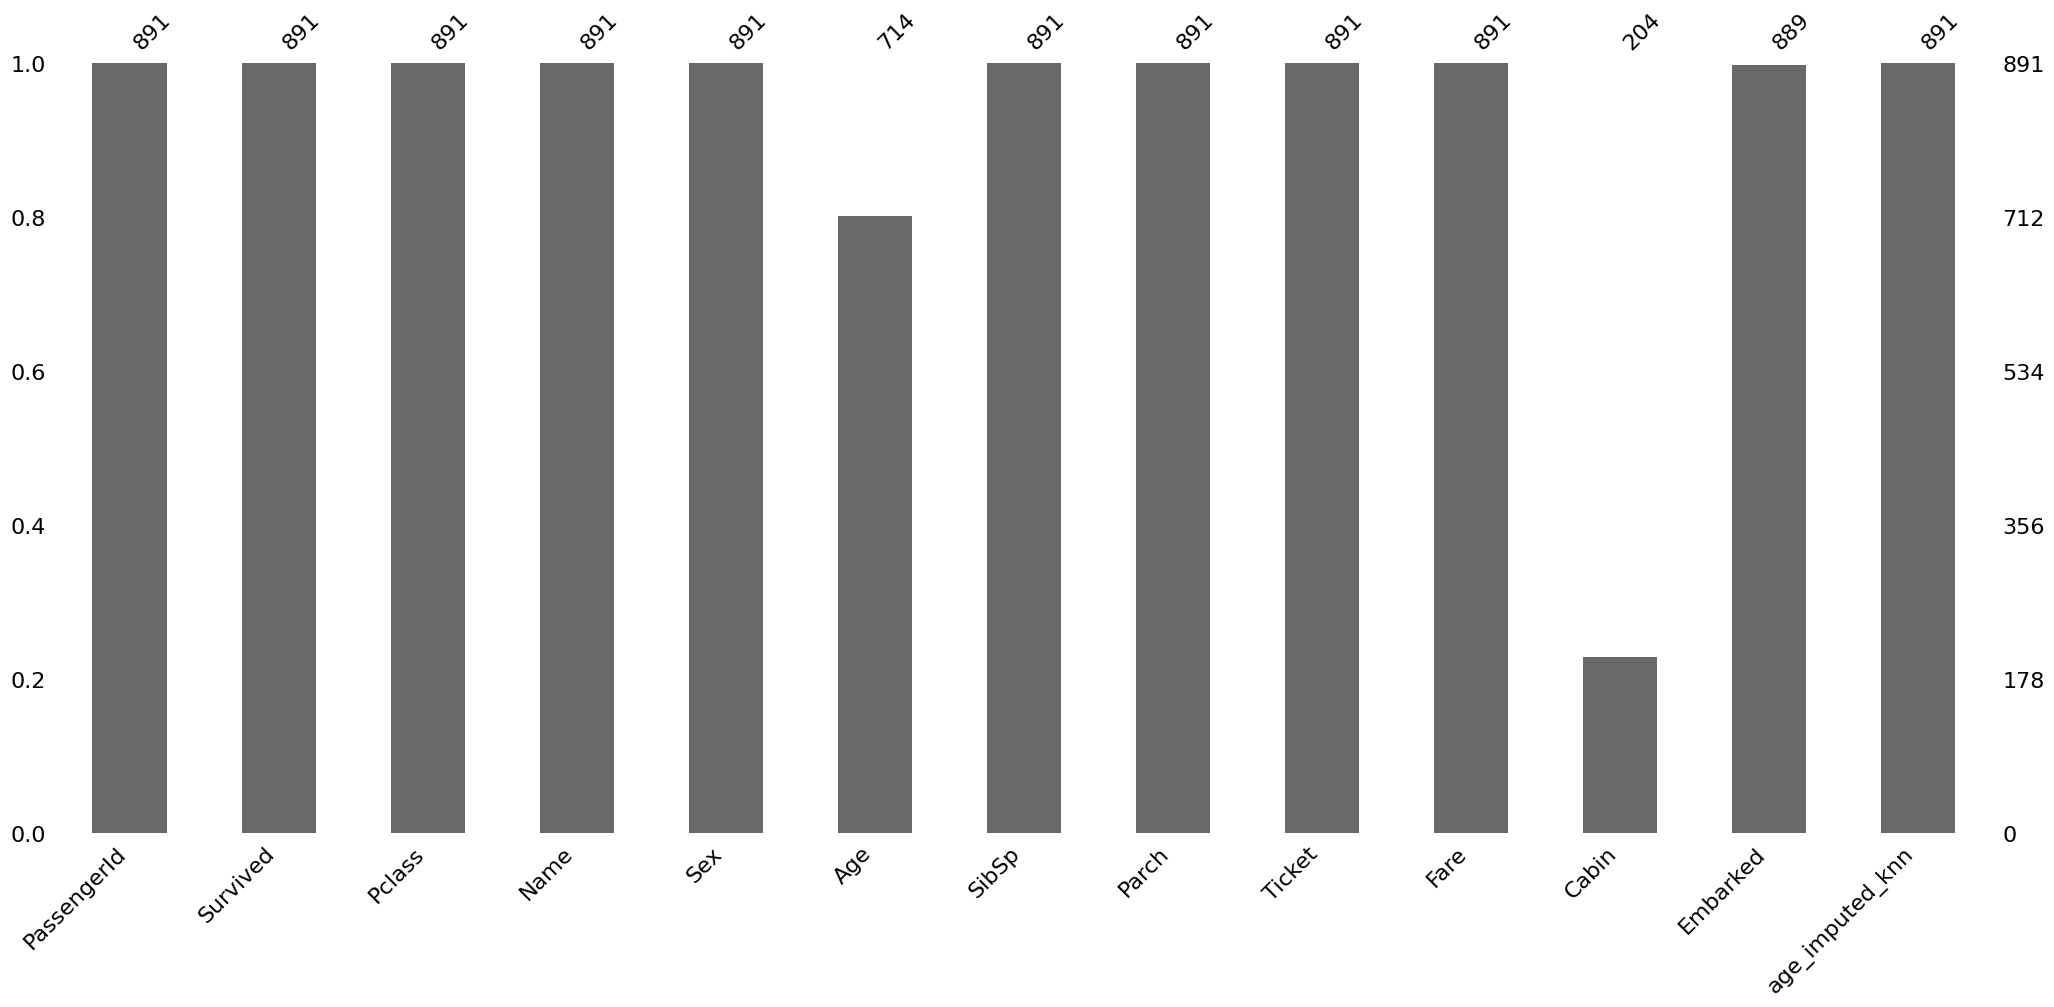

In [53]:
import missingno as msno 
from matplotlib import pyplot as plt
msno.bar(df)
plt.show()


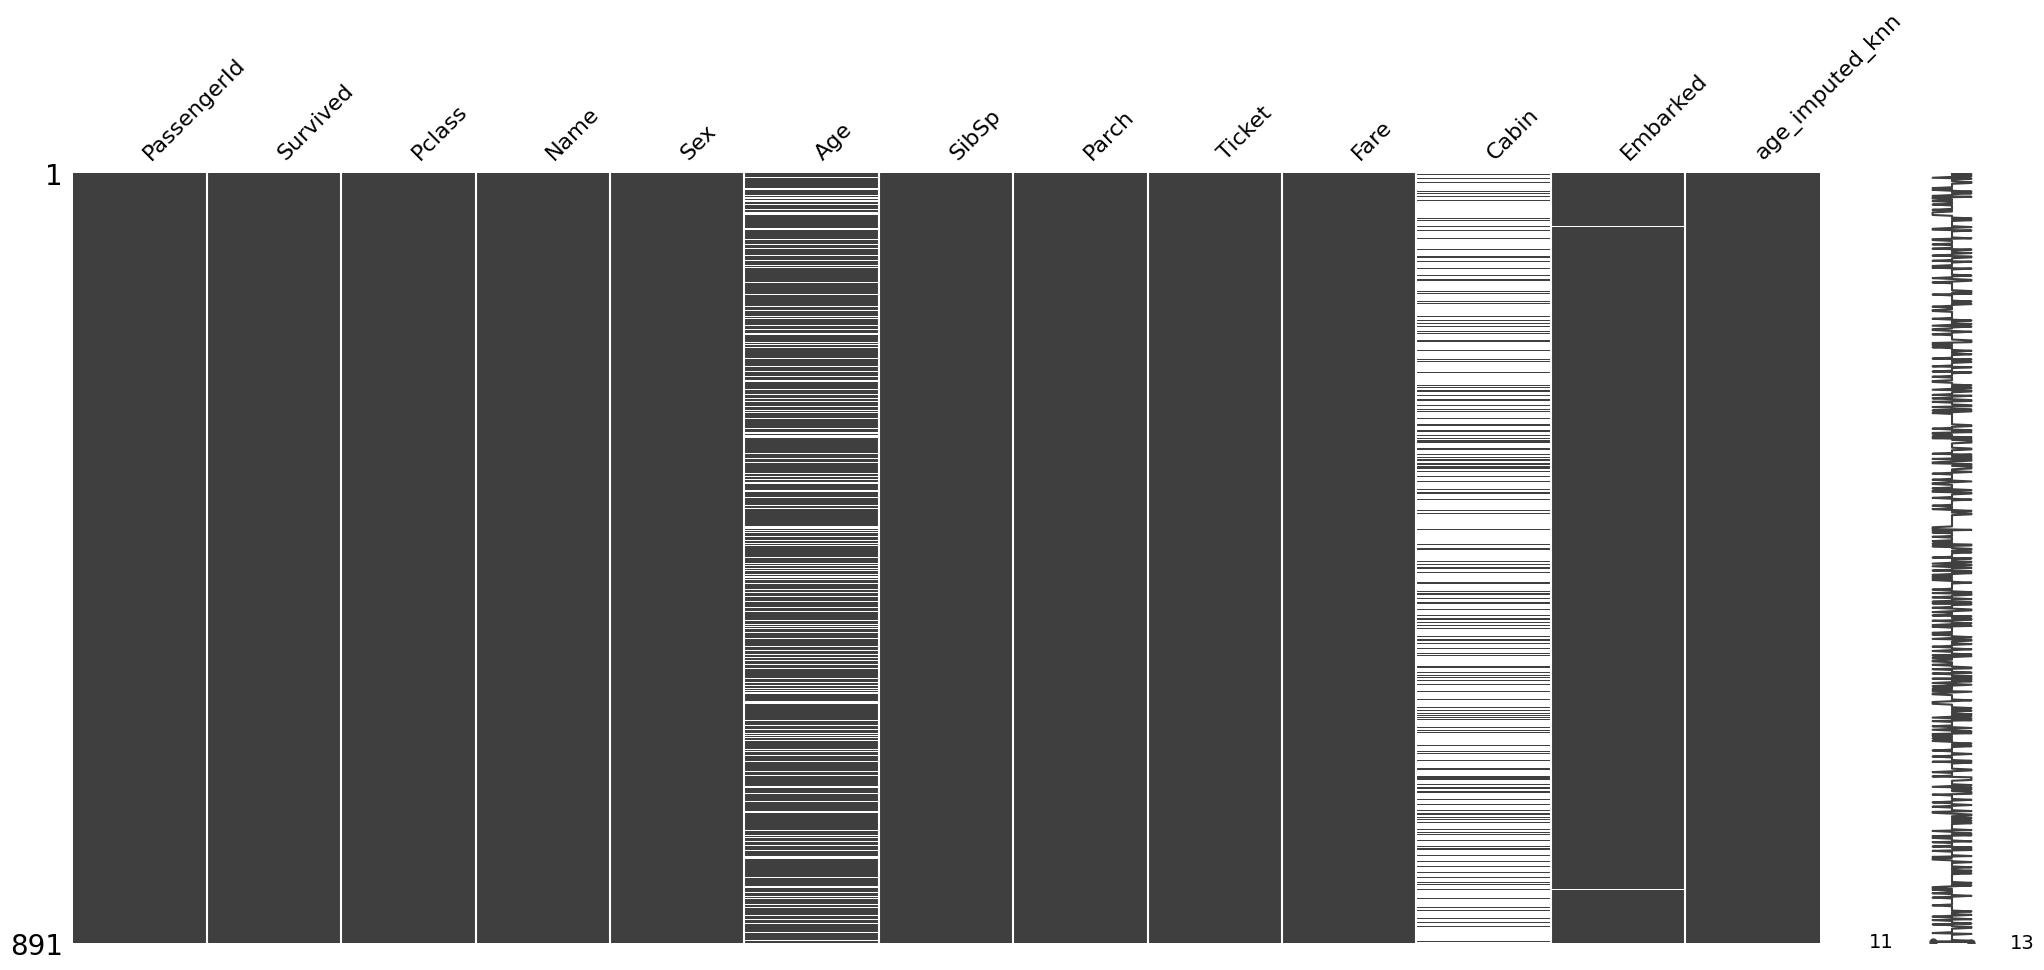

In [54]:
msno.matrix(df)
plt.show()

Buradaki siyah veya beyaz yapilarin baska bir degiskende de cok benzer bir yapi gostermesi bagimlilik durumunu gosterebilirdi.

Bu teknik degiskenlerdeki eksikliklerin birlikte cikip cikmadigi hakkinda bilgi verir.

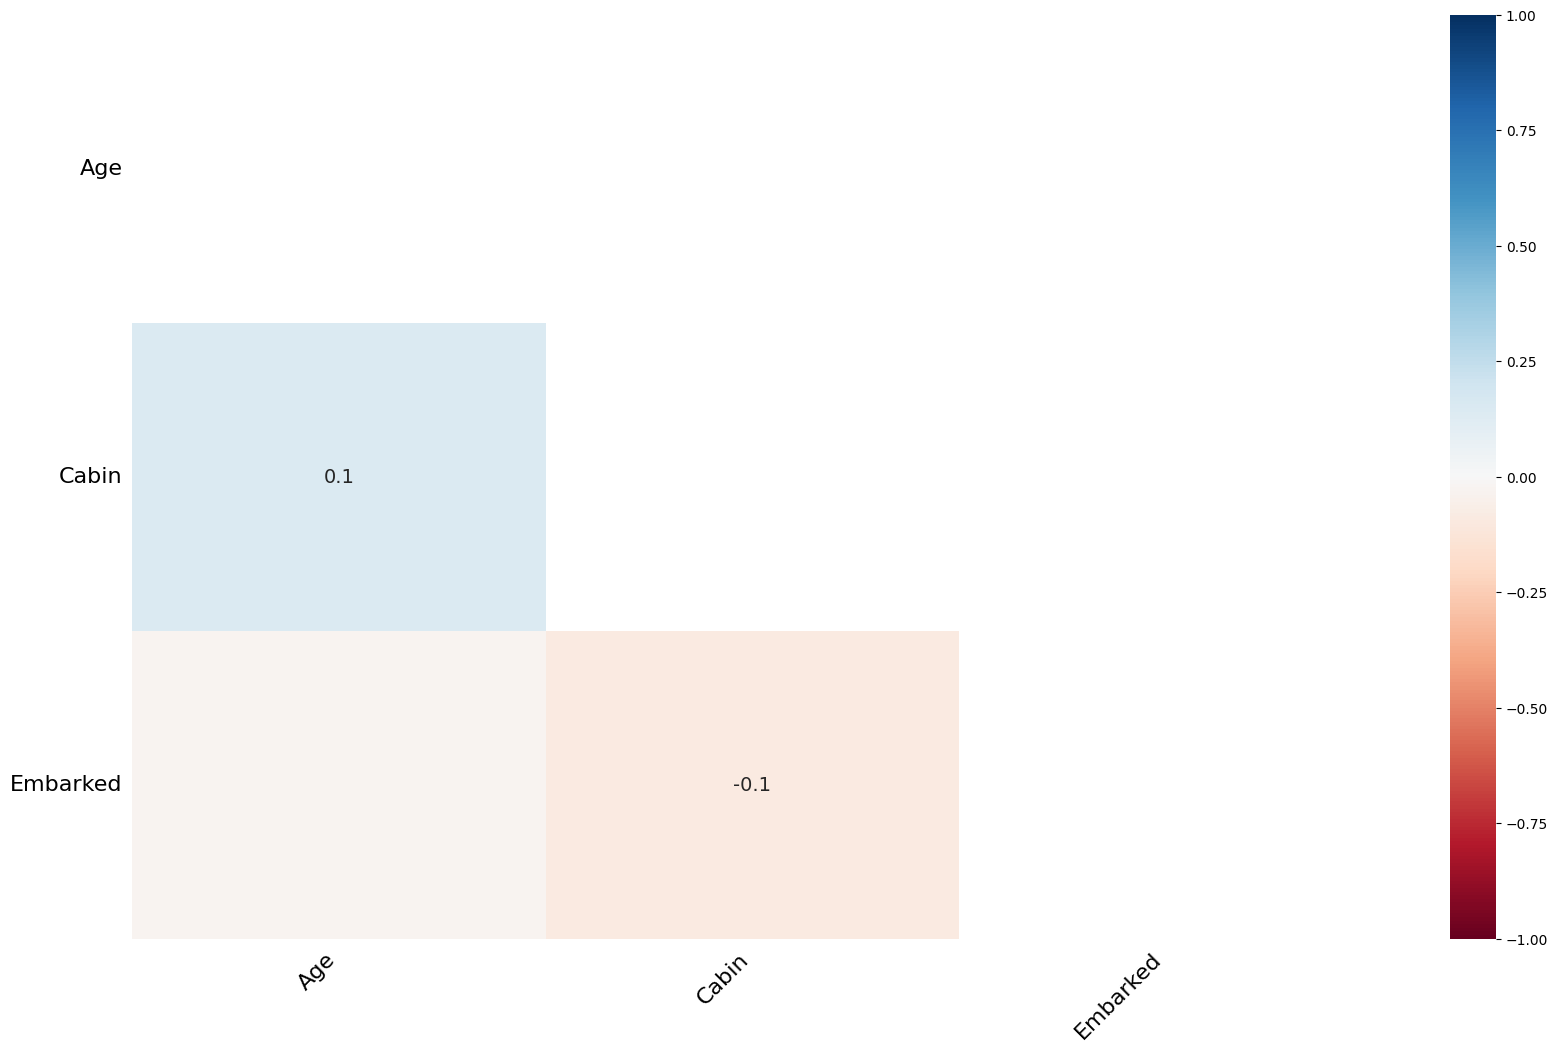

In [55]:
msno.heatmap(df)
plt.show()

Heatmap eksiklikler uzerine kurulu bir isi haritasidir. Bu bize nulity correlation degerlerini bize sunar ve cok degerlidir.

Eksik degerler belli bir korelasyon ile mi ortaya cikmis? EKsik degerler rassal mi? Bir degiskende eksiklik varken diger degiskende de eksiklik varsa bu eksiklikler birlikte mi olusuyor gibi bir durumu incelemek istiyorduk.

Burada onemli bir konu var, 2 durum gozleyebiliriz:
- Eksikliklerin birlikte cikmasi senaryosu ve 
- Eksikliklerin belirli bir degiskene bagimli olarak cikmasi senaryosu

ikisi de bagimlilik senaryosudur ama aralarinda ufak bir fark var. 

Bizim veri setimizi heatmap ile yorumlayacak olursak; nulity correlation anlamli gozukmuyor. --> 0.1 cikti. Eger 0.6 uzerinde ciksaydi bu degisikliklerin birlikte ortaya cikabileceginden suphelenirdik. Sonra ilgili degiskenlere gidip analiz edip neden ortaya cikmis diye degerlendirirdik.

### Eksik Degerlerin Bagimli Degisken ile Iliskisinin Incelenmesi (Analizi)
Eksik degere sahip degiskenleri bir cekelim bakalim.


In [56]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22
          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [57]:
na_cols

['Age', 'Cabin', 'Embarked']

In [58]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)  # eksiklik gordugun yere 1, digerine 0 yaz
    
    na_flags = temp_df.loc[:, temp_df.columns.str.contains('_NA_')].columns  # butun satirlari getir fakat icerisinde na olan sutunlari sec
    # bu biraz daha uzun yol ama .loc[:, t...] su kullanim faydali olabilir diye list comprehension yerine boyle yaptik
    
    for col in na_flags:
        print(pd.DataFrame({'TARGET_MEAN': temp_df.groupby(col)[target].mean(),
                            'Count': temp_df.groupby(col)[target].count()}), end='\n\n\n')
        


In [59]:
missing_vs_target(df, 'Survived', na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




Normalde cabin degiskeninde cok eksik var diye ucurabilirdik, ama burada gormus olduk ki cabin degiskeni na olanlarin hayatta kalma oranlari dolu olanlara gore cok dusuk. BUrada bir analiz, yorum yapilabilir. E ne yapacagiz peki? Hic bir sey yapmayacagiz, daha analiz yapiyoruz. Bir fikir edindik. Bundan sonra kabin degiskenine farkli yaklasacagim dedim.

Ikisi arasindaki oran cok yuksek oldugundan ve frekanslar da kayda deger oldugundan sanki bir iliski varmis gibi.Henuz bilmiyorum.

Age_na_flag icin de bir fikir edindim bu da bir aklimda olsun diyorum.

#### Recap
Son verilen analiz kismi ileri analizdir, bilmek faydali. Buradan ogrendigin fonksiyonu ilerde de kullanabilirsin.